In [1]:
%matplotlib inline

import numpy as np

from astropy.stats import BoxLeastSquares

from lightkurve import search_targetpixelfile
from lightkurve import TessTargetPixelFile
from lightkurve import TessLightCurveFile
from lightkurve import search_lightcurvefile
import lightkurve as lk
from lightkurve import read

In [2]:
tpf = TessTargetPixelFile("telescope_data/tess2018206045859-s0001-0000000394634714-0120-s_tp.fits")
tpf

TessTargetPixelFile(TICID: 394634714)

<Axes: title={'center': 'Target ID: 394634714, Cadence: 70445'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

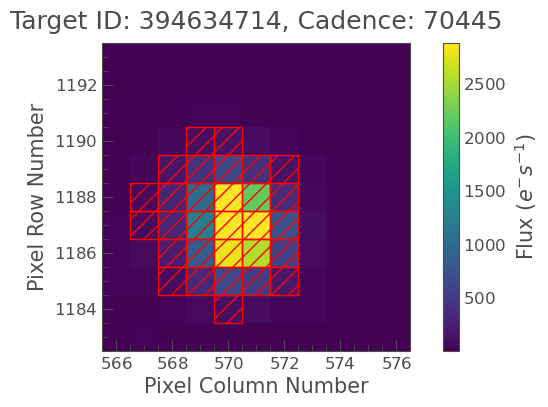

In [3]:
tpf.plot(aperture_mask=tpf.pipeline_mask)

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

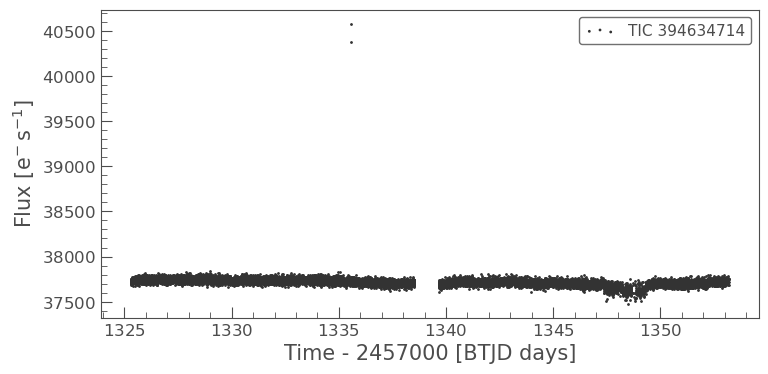

In [4]:
lc = tpf.to_lightcurve()
lc.scatter()

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

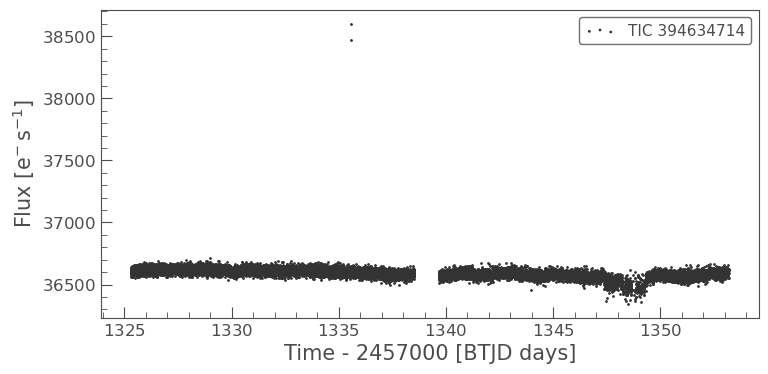

In [9]:
aperture_mask = tpf.create_threshold_mask(threshold=10)
lc = tpf.to_lightcurve(aperture_mask=aperture_mask)
lc.scatter()

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

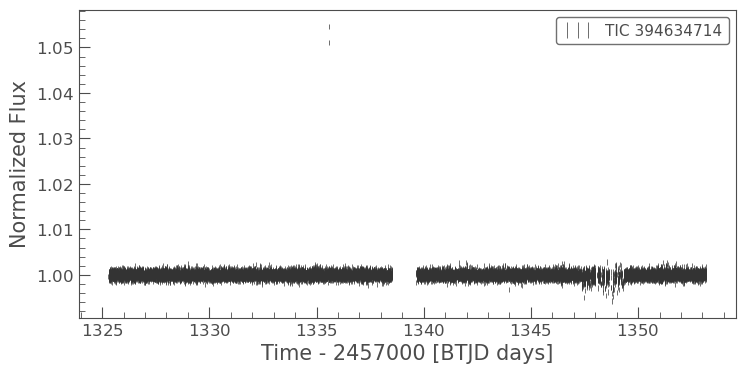

In [10]:
flat_lc = lc.flatten(window_length=1001)
flat_lc.errorbar()

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

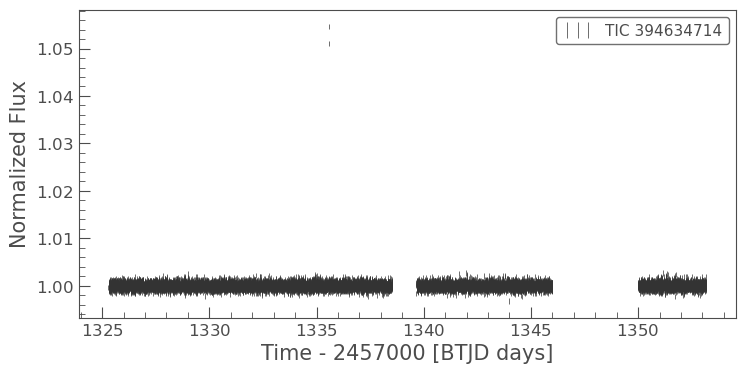

In [11]:
mask = (flat_lc.time.value < 1346) | (flat_lc.time.value > 1350)
masked_lc = flat_lc[mask]
masked_lc.errorbar()

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

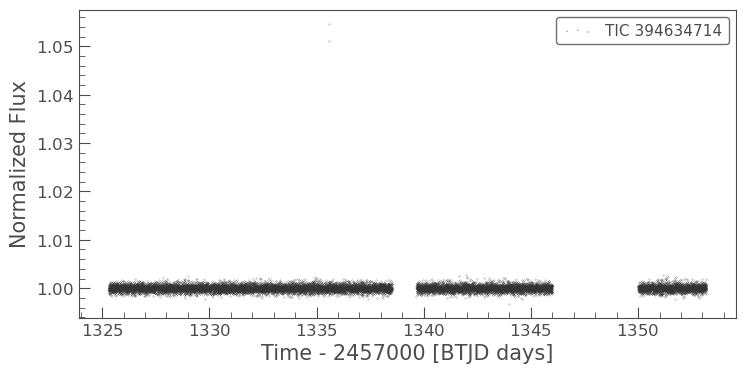

In [12]:
mask = (flat_lc.time.value < 1346) | (flat_lc.time.value > 1350)
masked_lc = flat_lc[mask]
masked_lc.scatter(s=0.1)

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

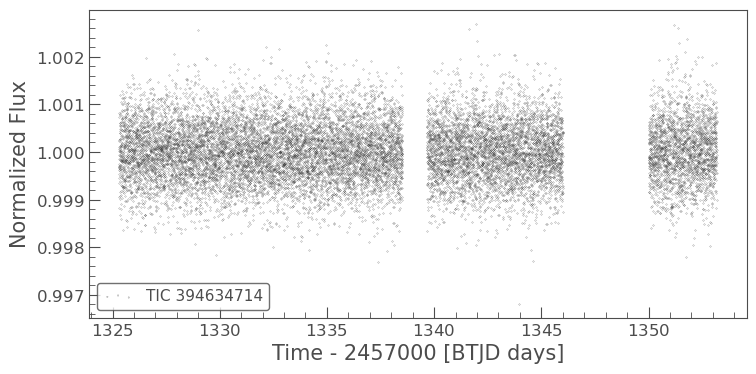

In [13]:
clipped_lc = masked_lc.remove_outliers(sigma=6)
clipped_lc.scatter(s=0.1)

<Axes: xlabel='Period [$\\mathrm{d}$]', ylabel='BLS Power'>

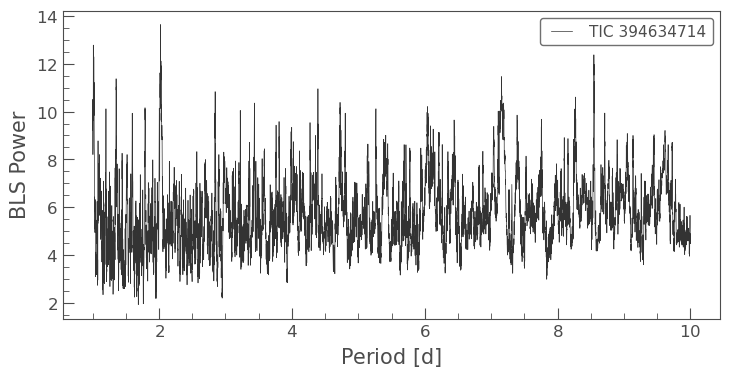

In [14]:
periodogram = clipped_lc.to_periodogram(method='bls', period=np.arange(1, 10, 0.001))
periodogram.plot()

In [15]:
best_fit_period = periodogram.period_at_max_power
print('Best fit period: {:.3f}'.format(best_fit_period))

Best fit period: 2.022 d


<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

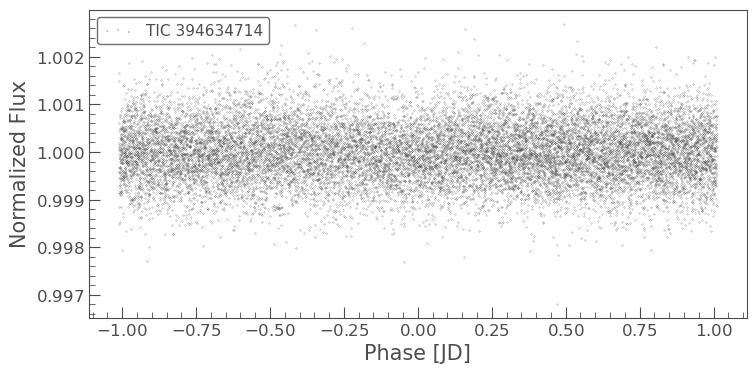

In [20]:
folded_lc = clipped_lc.fold(period=2.022)
folded_lc.scatter(s=0.1)

C:\Users\danie\AppData\Local\Temp\ipykernel_20796\1351632587.py:1: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  binned_lc = folded_lc.bin(binsize=10)


<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

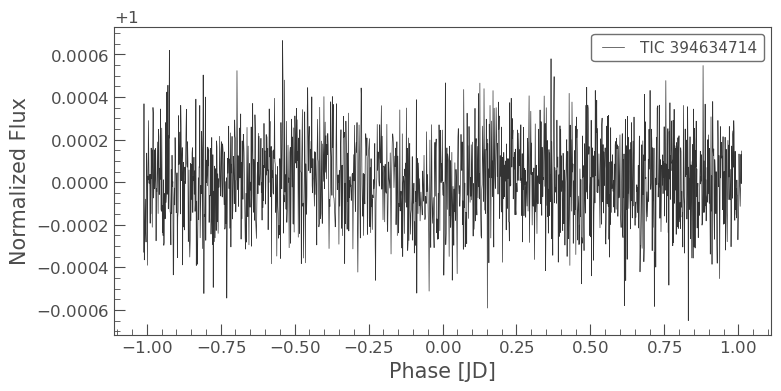

In [21]:
binned_lc = folded_lc.bin(binsize=10)
binned_lc.plot()

C:\ProgramData\anaconda3\Lib\site-packages\astropy\utils\decorators.py:604: LightkurveDeprecationWarning: "t0" was deprecated in version 2.0 and will be removed in a future version. Use argument "epoch_time" instead.
  return function(*args, **kwargs)


<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

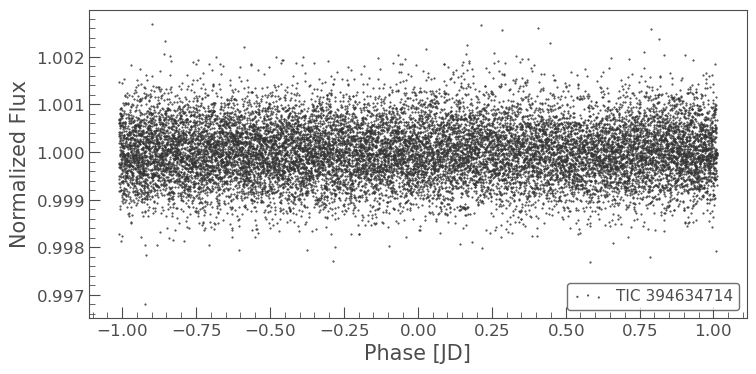

In [23]:
folded_lc = clipped_lc.fold(period=2.022, t0=1355)
folded_lc.scatter(s=1)

C:\Users\danie\AppData\Local\Temp\ipykernel_20796\790570873.py:1: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  binned_lc = folded_lc.bin(binsize=10)


<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

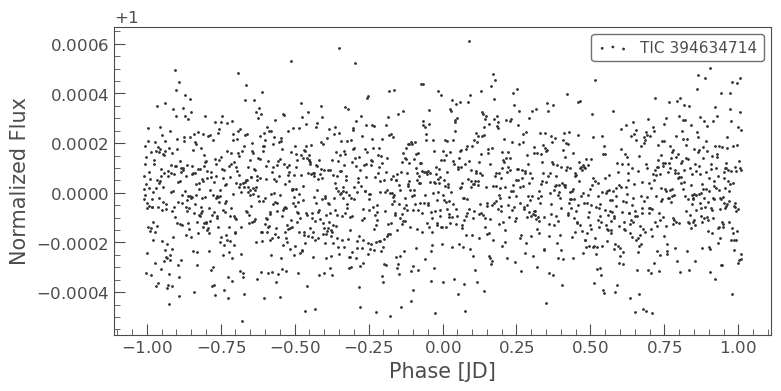

In [24]:
binned_lc = folded_lc.bin(binsize=10)
binned_lc.scatter()